# Projet 5 : Optimisez la gestion des données d'une boutique avec Python
<div>
<img src="bottleneck.png" style = "width: 600px; height: 300px" title = "BottleNeck"/>
</div>

### <center>Réalisée par: Thi Tuong Le</center>

#### <center>Data Analyst</center>

**_Aujourd’hui est un grand jour, je commence ma mission en tant que data analyst freelance chez BottleNeck, un marchand de vin très prestigieux. Je vous présent le projet sur "Optimisez la gestion des données de BottleNeck avec Python". Les missions sont: 1) de manuplier et nettoyer les 3 jeu de données, 2)calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne, 3)effectuer une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité._**

**_Compétences_**
* **Classifier différents types de données**
* **Gérer les erreurs et les incohérences présentes sur des données stockées**
* **Réaliser une analyse univariée pour interpréter des données**

## Sommaire 

1. [Libraries](#1.-Libraries)
2. [Datasets](#2.-Datasets)
3. [Analyse du dataframe "erp"](#3.-Analyse-du-dataframe-"erp")   
4. [Analyse du dataframe "liaison"](#4.-Analyse-du-dataframe-"liaison")
5. [Analyse du dataframe "web"](#5.-Analyse-du-dataframe-"web")                                                                      
    5.1. [Explorer les produits et les informations des lignes correspondantes](#5.1.-Explorer-les-produits-et-les-informations-des-lignes-correspondantes)                      
    5.2. [Nettoyage du dataframe "web"](#5.2.-Nettoyage-du-dataframe-"web")
6. [Jointures des 3 dataframes](#6.-Jointures-des-3-dataframes)
7. [Calcul du chiffre d'affaires](#7.-Calcul-du-chiffre-d'affaires)                                                                       
    7.1. [Calcul du chiffre d'affaires par produit](#7.1.-Calcul-du-chiffre-d'affaires-par-produit)                                                    
    7.2. [Calcul du chiffre d'affaire total](#7.2.-Calcul-du-chiffre-d'affaire-total)
8. [Analyse sur le prix](#8.-Analyse-sur-le-prix)                                                                                  
    8.1. [Visualization sur le prix ](#8.1-Visualization-sur-le-prix)                                                                
    8.2. [Liste des outliers](#8.2.-Liste-des-outliers)                                                                         
    8.3. [Les outliers les plus élevés](#8.3.-Les-outliers-les-plus-élevés)
9. [Conclusion](#9.-Conclusion)

## 1. Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## 2. Datasets 

In [2]:
# Get current working directory
import os
os.getcwd()

'/Users/lethituong/Desktop/Data Analyst/P5/Optimize store data management with Python'

In [3]:
erp = pd.read_excel("erp.xlsx")
web = pd.read_excel ("web.xlsx")
liaison = pd.read_excel ("liaison.xlsx")

## 3. Analyse du dataframe "erp" 

In [4]:
# Insight into dataset
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
product_id        825 non-null int64
onsale_web        825 non-null int64
price             825 non-null float64
stock_quantity    825 non-null int64
stock_status      825 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [6]:
# valeurs manquantes, nulls et NA
print(erp.isnull().values.any())

False


In [7]:
# doublons
print(erp.duplicated().values.any())

False


In [8]:
# la sommes de NaN 
erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [9]:
# Description de le jeu de données
erp.describe ()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


**_Le je de données "erp" ne contient pas de doublons ni de valeurs nulles._**

## 4. Analyse du dataframe "liaison" 

In [10]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [11]:
# Taille de le data
liaison.shape

(825, 2)

In [12]:
# doublons
print(liaison.duplicated().values.any())

False


In [13]:
# valeurs manquantes, nulls et NA
print(liaison.isnull().values.any())

True


In [14]:
# Nombre de laveurs manquantes par colonne
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [15]:
# Création une dataframe qui contient que les valeurs NaNs dans la colonne id_web
nan = liaison[liaison.isna().any(axis=1)]

In [16]:
nan

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


**Probablement, ce sont les produits qui n'ont pas été mis sur le web car ils ne sont pas vendus. Donc, on supprime toutes les lignes qui contiennent une NaN dans la colonne "id_web"** 

In [17]:
# On supprimme toutes les lignes qui a été remplis par NaN dans la colonne "id_web"
liaison = liaison.dropna()

In [18]:
liaison.shape

(734, 2)

In [19]:
# On affiche le nombre de doublons pour vérifier encore une fois 
liaison.duplicated("id_web").sum ()

0

In [20]:
# On affiche les infos du "liaison"
liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
product_id    734 non-null int64
id_web        734 non-null object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


**On réussit de nettoyer le jeu de données "liaison".**

## 5. Analyse du dataframe "web" 

In [21]:
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


**On calculte le nombre de valeur NaN dans la colonne "sku".**

In [22]:
recherche_null = web [ web["sku"].isnull()]
print(recherche_null.shape)
print(" ")
recherche_null.head(30)

(85, 28)
 


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Le nombre des NaNs dans la colonne "sku" est de 85.**

In [23]:
# recuperation des lignes contenant de l'informations sur de vrais produits = > investiguer aupres des collegues
ligne = recherche_null[recherche_null['post_name'].notnull()]
ligne

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


**_On trouve que les deux lignes qui contient des informations sur le post_name, post_date, et post_modified mais indiquent NaN sur la colonne "sku". Le post a été modifié en 2019 et posté en 2018. Donc, probablement les deux produits ne sont plus vendus. On observe aussi les autre colonnes comme virtual, ownloadable,	rating_count sont remplis avec les valeurs par 0._**

In [24]:
web_sans_null = web[web['sku'].notnull()]
web_sans_null.shape

(1428, 28)

### 5.1. Explorer les produits et les informations des lignes correspondantes 

In [25]:
web.shape

(1513, 28)

In [26]:
#aide pour ecrire la fonction pour tester la cles primaire
print(web_sans_null.size)
print(web_sans_null.drop_duplicates(['sku']).size)

39984
19992


In [27]:
print("Les valeurs unique de sku dans le web dataframe est de", web.sku.unique())

Les valeurs unique de sku dans le web dataframe est de ['bon-cadeau-25-euros' 15298 15296 15300 19814 19815 15303 14975 16042
 14980 16041 15269 14977 16044 16043 16449 16045 16030 13127 19816 16029
 16039 16318 16275 16498 16320 16319 15966 15022 15967 15490 16416 11862
 15444 15953 12045 13074 15941 16069 13072 15440 13435 13078 13117 16296
 16014 16462 16013 16180 15676 16120 15564 15675 15378 15813 13416 14905
 15767 16505 15683 16504 15787 14800 15353 15382 15339 11668 13209 15341
 13217 304 11641 1662 1360 15648 1364 7086 1366 15140 16238 16237 15141
 14944 14941 14751 16093 15668 15373 15375 14474 15482 13453 15075 16124
 15785 15784 15786 14332 16210 16211 16209 15629 15583 16160 16166 15783
 16560 15747 15746 16190 16189 16265 16191 16263 15605 16529 15441 13032
 16256 16322 16295 15656 15655 15415 15414 15413 16023 16024 15720 15714
 15717 15718 15480 15213 15672 12599 15758 15829 15759 16585 15306 16497
 15261 12657 15403 15461 16269 13905 16567 15436 14725 15310 15770 16097

In [28]:
# Le nommre de doublons dans la colonne "sku"
web.duplicated("sku").sum()

798

In [29]:
# Le nombre de valeur unique par colonne
web.nunique ()

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [30]:
# Description de la dataframe
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [31]:
# On affiche un produit pour avoir une idée du doublon
web.loc[web["sku"]== "13127-1"]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [32]:
# On affiche le "bon de cadeau"
web.loc[web["sku"] == "bon-cadeau-25-euros"]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


**_Ici on trouve que les produits choisi qu'il y a un doublon sur les deux et les lignes sont bien identiques (même valeur et même produit). Sauf dans la colonne de "tax_status" (l'un a une valeur qui indiqué "taxable" et l'autre c'est "NaN"). Peut-être c'est le produit a vendu qui a indiqué "taxable" et l'autre aucune valeur? Dans la colonne "post_type", il y a "product" et l'autre a "attachment". Dans la colonne "post_mime_type", il y a "NaN" et l'autre a "image/jpeg". Donc, on décide de garder les lignes qui contient "product"._**

### 5.2. Nettoyage du dataframe "web" 

In [33]:
# On decide de garder les doublons qui ont les lignes contiennet une image
web = web[web.post_type == "product"]

In [34]:
# On supprime les colonnes qui ont que des NaNs
web = web.dropna (how = "all", axis = 1)

In [35]:
# On renomme la colonne "sku" en "id_web" pour profiter plus tard
web = web.rename(columns={"sku": "id_web"})

In [36]:
# On affiche "web"
web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [37]:
web.shape

(716, 23)

In [38]:
# On affiche les infos de "web"
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 23 columns):
id_web               714 non-null object
virtual              716 non-null int64
downloadable         716 non-null int64
rating_count         716 non-null int64
average_rating       716 non-null float64
total_sales          716 non-null float64
tax_status           716 non-null object
post_author          716 non-null float64
post_date            716 non-null datetime64[ns]
post_date_gmt        716 non-null datetime64[ns]
post_title           716 non-null object
post_excerpt         716 non-null object
post_status          716 non-null object
comment_status       716 non-null object
ping_status          716 non-null object
post_name            716 non-null object
post_modified        716 non-null datetime64[ns]
post_modified_gmt    716 non-null datetime64[ns]
post_parent          716 non-null float64
guid                 716 non-null object
menu_order           716 non-null float64


**_On réussit de nettoyer le jeu de données du "web"_**

## 6. Jointures des 3 dataframes 

In [39]:
# On merge de la dataframe "liaison" à "erp" par la même clé "product_id"
df_erp_liaison = erp.merge(right = liaison, on = "product_id")
df_erp_liaison.shape

(734, 6)

In [40]:
# On afiche "df_erp_liaison"
df_erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [41]:
# Description détaillée de ce dataframe
df_erp_liaison.describe(include = "all")

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
count,734.000000,734.000000,734.000000,734.000000,734,734.0
unique,NaN,NaN,NaN,NaN,2,734.0
top,NaN,NaN,NaN,NaN,instock,15711.0
freq,NaN,NaN,NaN,NaN,576,1.0
mean,5041.859673,0.972752,32.216894,27.986376,NaN,NaN
std,790.309295,0.162916,27.525448,47.573392,NaN,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN,NaN
25%,4287.250000,1.000000,14.100000,1.000000,NaN,NaN
50%,4862.500000,1.000000,23.400000,12.000000,NaN,NaN
75%,5714.250000,1.000000,41.800000,35.000000,NaN,NaN


In [42]:
# On merge de la dataframe "web" à "df_erp_liaison" par même clé "id_web"
df = df_erp_liaison.merge(right = web, on = "id_web")

In [43]:
# On affiche df
df.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [44]:
# On affiche les infos de df
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 28 columns):
product_id           714 non-null int64
onsale_web           714 non-null int64
price                714 non-null float64
stock_quantity       714 non-null int64
stock_status         714 non-null object
id_web               714 non-null object
virtual              714 non-null int64
downloadable         714 non-null int64
rating_count         714 non-null int64
average_rating       714 non-null float64
total_sales          714 non-null float64
tax_status           714 non-null object
post_author          714 non-null float64
post_date            714 non-null datetime64[ns]
post_date_gmt        714 non-null datetime64[ns]
post_title           714 non-null object
post_excerpt         714 non-null object
post_status          714 non-null object
comment_status       714 non-null object
ping_status          714 non-null object
post_name            714 non-null object
post_modified       

_**On bien remarque la price est "float64" mais le "total_sales" est aussi de "float64".**_

## 7. Calcul du chiffre d'affaires 

### 7.1. Calcul du chiffre d'affaires par produit 

**_Pour calculer le chiffre d'affaires, on doit changer le type de la colonne "total_sales" de "float64" à "int"._**

In [45]:
# Changer le type de la colonne "total_sales" de "float64" à "int"
df["total_sales"] = df["total_sales"].astype(int)

In [46]:
# On crée une nouvelle colonne "ca" pour contenir le chiffre d'affaire pour chaque produit
df["ca"] = df["price"] * df ["total_sales"]

In [47]:
# On affiche pour voir la colonne "ca" avec les chiffre d'affraie par produit
df.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0


### 7.2. Calcul du chiffre d'affaire total 

In [48]:
# Faire la somme des valeurs de la colonne "ca"
ca_total = df["ca"].sum()

In [49]:
print("Le chiffre d'affraire total est de", ca_total, "euros.")

Le chiffre d'affraire total est de 70568.6 euros.


## 8. Analyse sur le prix 

In [50]:
# On calcul de la moyenne de la colonne "price"
df.price.mean()

32.49313725490197

In [51]:
# On calcul de l'écart-type
df.price.std()

27.810524922323726

In [52]:
# On affiche le valeur médiane
df.price.median()

23.55

In [53]:
# On affiche le valeur la plus haute
df.price.max()

225.0

In [54]:
# On affiche le valeur la plus basse
df.price.min()

5.2

In [55]:
# On calcul des valeurs quartiles
df.price.quantile([0.25, 0.5, 0.75])

0.25    14.100
0.50    23.550
0.75    42.175
Name: price, dtype: float64

In [56]:
# On vérifie tous les infos par fonction "describe"
df.price.describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

**_On bien observe les valeurs nécessaire pour comprendre qu'est-ce au'il pass dans la colonne "price". Le min est 5.2 euros et max c'est 225 euros. Le median est de 32.49 euros. Écart-type est de +/-27.81. En suite, on va faire la visualization pour plus de lisibilité._**

### 8.1. Visualization sur le prix

**On choisit un graphique Boxplot pour faire une présentation des tous les valeurs includent les valeurs abérrantes. Because Boxplot is a standardized way of displaying the distribution of data based on a five number summary: the first quartile, minimum, median, the third quartile,and maximum. The [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can tell us:**

* **Tell us the values of the outliers**
* **Identify if data is symmetrical**
* **Determine how tightly data is grouped**
* **See if the data is skewed**

<div>
<img src= "labeled-boxplot.png" style = "width:800px; height: 400px" title = "Boxplot"/>
</div>

For those who are unfamiliar with the terminology of this diagram, they are described below:

* Q1: The first quartile of the dataset. 25% of values lie below this level.
* Median: The second quartile of the dataset. 50% of values lie above and below this level.
* Q3: The third quartile of the dataset. 25% of values lie above this level.
* The boxplot 'Minimum', defined as Q1 less 1.5 times the interquartile range.
* The boxplot Maximum, defined as Q3 plus 1.5 times the interquartile range.
* The median: the midpoint of the datasets.
* Interquartile range (IQR): the distance between Q1 and Q3 (IQR = Q3 - Q1). This measure is less affected by extreme values (outliers) since it focused on the values lying in the middle and it is good measure for skewed distributions.
* Outliers: data points that are below Q1 or above Q3. That is presented by the small circles/ dots as we see in the figure (left and right whiskers). Any point outside the both "whiskers" are called "outlier".


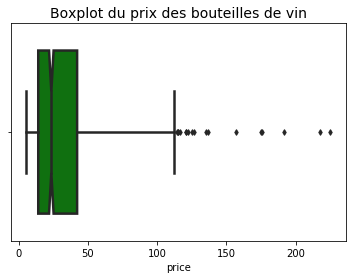

In [57]:
# On crée le boxplot
sns.boxplot (x = df.price, notch = "True", 
                  color = "green",
                 width = .75,
                 linewidth = 2.5,
                 whis = 2.5,
                 fliersize = 4,
                  showcaps = True
                 )
plt.title("Boxplot du prix des bouteilles de vin", fontsize = 14)
plt.show()

**_Ce graphique représente beaucoup de prix qui sont considéré comme les valeurs abérrantes (outliers)._**

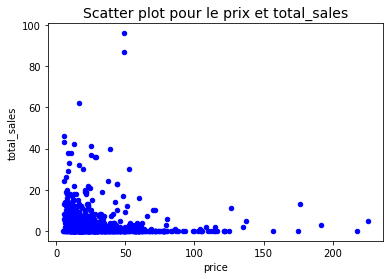

In [58]:
# On affiche un nuage de point pour décrire
df.plot.scatter (x = "price", y = "total_sales", color = "blue")
plt.title ("Scatter plot pour le prix et total_sales", fontsize = 14)
plt.show()

**Ici on peut voir le nombre des bouteilles de vin vendu est en relation avec son prix.**

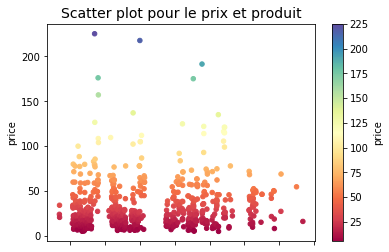

In [59]:
# On affiche un nuage de point concerne de relation entre le prix de chaque
df.plot.scatter(x = "product_id", y = "price", c = "price", cmap = "Spectral")
plt.title("Scatter plot pour le prix et produit", fontsize = 14)
plt.show()

_**On remarque au moins 6 prix de produit qui sont aberrants.**_

### 8.2. Liste des outliers 

In [60]:
# On calcul la vraiable distance de l'écart inter-quartile (Inter-quantile range = IQR)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = np.round((Q3 - Q1),2)
print (IQR)

28.08


In [61]:
# On affiche de la limite supérieur
sup = np.round((Q3 + 1.5 * IQR),2)
print ("La limite supérieur est de", sup, ".")

La limite supérieur est de 84.3 .


In [62]:
# On calcul de la limite inférieur
inf = np.round((Q1 - 1.5 * IQR),2)
print ("La limite inférieur est de", inf, ".")

La limite inférieur est de -28.02 .


In [63]:
# La liste des outliers dans la nouvelle colonne "outliers"
df["outliers"] = df.price > (Q3 + 1.5 * IQR)

In [64]:
# On affiche les outliers
liste_outliers = df.loc[(df["price"]> 84.3) &(df["id_web"].notna()),:]

In [65]:
# Le nombre de outliers
liste_outliers.shape

(32, 30)

**Il y a 32 produits qui ont le prix considéré comme les outliers.**

In [66]:
# On affiche la liste des outliers (32 outliers)
liste_outliers.sort_values(by = "price", ascending = False).head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca,outliers
199,4352,1,225.0,0,outofstock,15940,0,0,0,0.0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1125.0,True
426,5001,1,217.5,20,instock,14581,0,0,0,0.0,...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True
587,5892,1,191.3,10,instock,14983,0,0,0,0.0,...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,573.9,True
218,4402,1,176.0,8,instock,3510,0,0,0,0.0,...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2288.0,True
553,5767,1,175.0,12,instock,15185,0,0,0,0.0,...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True


In [67]:
# Calcul du CA des 32 outliers
print("Le chiffre d'affraire total des 32 produits qui sont outliers est de", liste_outliers.ca.sum(), "euros.")

Le chiffre d'affraire total des 32 produits qui sont outliers est de 6970.0 euros.


In [68]:
# Calcul de la proportion des ventes des outliers
print("La proportion des ventes des produits outliers est de", np.round((liste_outliers.ca.sum()/df.ca.sum()*100),2), "%.") 

La proportion des ventes des produits outliers est de 9.88 %.


### 8.3. Les outliers les plus élevés 

In [69]:
# On affiche la liste des produits qui ont les outliers plus fort 
outlier1 = df.price.quantile(0.99)
outlier_price = df[df["price"]>outlier1]
outlier_price.sort_values (by = "price", ascending = False)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca,outliers
199,4352,1,225.0,0,outofstock,15940,0,0,0,0.0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1125.0,True
426,5001,1,217.5,20,instock,14581,0,0,0,0.0,...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True
587,5892,1,191.3,10,instock,14983,0,0,0,0.0,...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,573.9,True
218,4402,1,176.0,8,instock,3510,0,0,0,0.0,...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2288.0,True
553,5767,1,175.0,12,instock,15185,0,0,0,0.0,...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True
221,4406,1,157.0,3,instock,7819,0,0,0,0.0,...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True
381,4904,1,137.0,13,instock,14220,0,0,0,0.0,...,domaine-des-croix-corton-charlemagne-grand-cru...,2020-05-19 17:15:02,2020-05-19 15:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,685.0,True
642,6126,1,135.0,10,instock,14923,0,0,0,0.0,...,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,270.0,True


**On a 8 produits.**

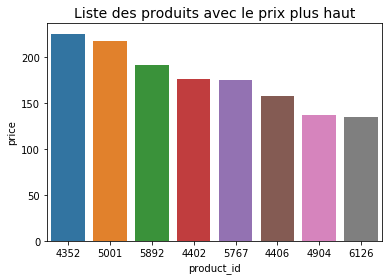

In [70]:
# Visualisation
sns.barplot(x = outlier_price.product_id, y = outlier_price.price,
            order = outlier_price.sort_values("price", ascending = False).product_id)
plt.title("Liste des produits avec le prix plus haut", fontsize = 14)
plt.show()


## 9. Conclusion 

* **Le chiffre d’affaire total est de 70568.60 euros.**

* **Le chiffre d’affaire total des outliers (32 outliers) est de 6970 euros (9.88%)**

* **32 produits qui présentent comme les aberrantes (8 produits avec le prix plus élevés ). Problement, cette différence est venu de la différence de la qualité ou de la origine ou de la facon de fabriquer (temps, méthode, machine,...).**

## Fin